<a href="https://colab.research.google.com/github/cepdnaclk/e17-co328-Prediction-of-heart-disease-using-ECG/blob/main/Colab%20Notebooks/Binary_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Accessing the Kaggle dataset**
To implement the binary classifiers the ECG Heartbeat classification dataset has been used
[Access dataset](https://www.kaggle.com/shayanfazeli/heartbeat?select=ptbdb_abnormal.csv)

In [34]:
# install Kaggle
!pip install -q kaggle

In [ ]:
# accessing the dataset through the API token
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

In [ ]:
# create a kaggle directory and setting permissions
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d shayanfazeli/heartbeat

 86% 85.0M/98.8M [00:00<00:00, 193MB/s]
100% 98.8M/98.8M [00:00<00:00, 159MB/s]


In [ ]:
!unzip heartbeat.zip

Archive:  heartbeat.zip
  inflating: mitbih_test.csv         
  inflating: mitbih_train.csv        
  inflating: ptbdb_abnormal.csv      
  inflating: ptbdb_normal.csv        


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

**We have used the PTB diagnostic dataset to train a model to classify heartbeats as normal/abnormal**
The dataset has been preprocessed and padded

**Data Preparation:**

In [48]:
import numpy as np
import pandas as pd
import math
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# New Section

In [ ]:
df_normal = pd.read_csv('/content/ptbdb_normal.csv')
df_abnormal = pd.read_csv('/content/ptbdb_abnormal.csv')

In [ ]:
df_normal.head()

,1.000000000000000000e+00,9.003241658210754395e-01,3.585899472236633301e-01,5.145867168903350830e-02,4.659643396735191345e-02,1.268233358860015869e-01,1.333063244819641113e-01,1.191247999668121338e-01,1.106158867478370667e-01,1.130470037460327148e-01,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_abnormal.head()

,9.322328567504882812e-01,8.696785569190979004e-01,8.861859440803527832e-01,9.296264052391052246e-01,9.087749719619750977e-01,9.339704513549804688e-01,8.010425567626953125e-01,7.497828006744384766e-01,6.872285008430480957e-01,6.350998878479003906e-01,...,0.000000000000000000e+00.117,0.000000000000000000e+00.118,0.000000000000000000e+00.119,0.000000000000000000e+00.120,0.000000000000000000e+00.121,0.000000000000000000e+00.122,0.000000000000000000e+00.123,0.000000000000000000e+00.124,0.000000000000000000e+00.125,1.000000000000000000e+00.1
0,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# renaming columns for concatenation
df_normal.columns = list(range(len(df_normal.columns)))
df_abnormal.columns = list(range(len(df_abnormal.columns)))

In [ ]:
# concatenate the normal and abnormal datasets and shuffle
dataset = pd.concat([df_normal, df_abnormal], axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)

In [ ]:
# split the data into features and labels
dataset = dataset.rename({187: 'Label'}, axis=1)
y = dataset['Label'].copy()
x= dataset.drop('Label', axis=1).copy()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=1)


**Training the Model - Support Vector Machines**

**Accuracy - 90.58%**

In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(x_train, y_train)

SVC()

In [ ]:
model.score(x_test, y_test)

0.9058419243986254

In [ ]:
svc = svm.SVC(kernel='poly', C=10 , gamma = 10 ).fit(x_train, y_train)

In [ ]:
svc.score(x_test, y_test)

0.9560137457044674

**Training the Model - Naive Bays** 

**Accuracy - 63.09%**

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [ ]:
clf.fit(x_train, y_train)

GaussianNB()

In [ ]:
clf.score(x_test, y_test)

0.6309278350515464

**Training the Model - Nearest Neighbor** 

**Accuracy - 86.41%**

In [35]:
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.fit_transform(x_test)



In [36]:
math.sqrt(len(y_test))

66.06814663663572

In [57]:
classifier=KNeighborsClassifier(n_neighbors=35,p=2,metric="minkowski")

In [58]:
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=35)

In [59]:
y_pred = classifier.predict(x_test)

In [60]:
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(f1_score(y_test, y_pred))

[[ 932  307]
 [ 315 2811]]
0.9003843689942345


In [61]:
print(accuracy_score(y_test, y_pred))

0.8575028636884306


In [50]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 70):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

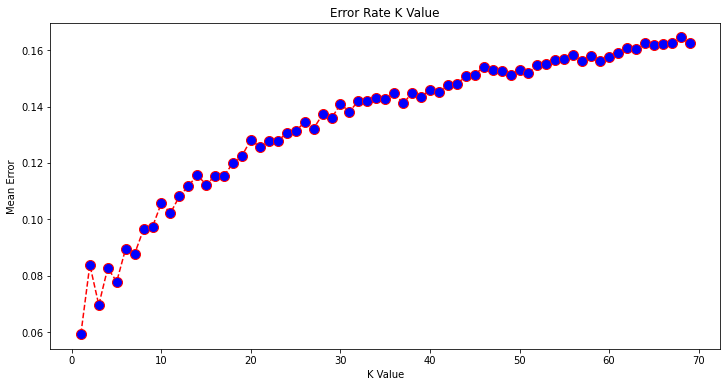

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 70), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')